# Linear Regression Model

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [24]:
# read the dataframe
df = pd.read_csv("Resources/cleaned_wake_w_date_df.csv")
df.head(10)

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Year_Built,HEATED_AREA,DESIGN_STYLE,BATH,Story_Height,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,year,month,Quarter
0,19,1,0.21,34500,1974-01-01,1964,1828,I,C,A,RALEIGH,27610.0,1974,1,1
1,20,16,0.46,35500,1983-05-18,1970,1240,A,A,A,RALEIGH,27610.0,1983,5,2
2,22,10,0.46,37500,2004-09-16,1900,2261,A,C,A,WENDELL,27591.0,2004,9,3
3,25,8,0.96,70000,1971-01-01,1971,3770,A,J,A,RALEIGH,27613.0,1971,1,1
4,30,1,0.47,380000,2015-08-12,1946,1789,A,C,A,RALEIGH,27607.0,2015,8,3
5,31,13,0.39,337500,2002-07-17,1970,2463,A,C,A,RALEIGH,27615.0,2002,7,3
6,33,4,0.50,32500,1979-02-06,1969,2389,G,E,A,RALEIGH,27607.0,1979,2,1
7,34,1,0.70,19500,1968-01-01,1968,1280,A,C,A,RALEIGH,27606.0,1968,1,1
8,35,1,0.49,319000,1996-01-16,1938,4650,A,F,B,RALEIGH,27608.0,1996,1,1
9,37,1,0.13,425000,2008-04-15,1921,1890,A,C,C,RALEIGH,27604.0,2008,4,2


In [6]:
# check for dtypes
df.dtypes

REAL_ESTATE_ID         int64
Township               int64
Deeded_Acreage       float64
Total_sale_Price       int64
Total_Sale_Date       object
Year_Built             int64
HEATED_AREA            int64
DESIGN_STYLE          object
BATH                  object
Story_Height          object
PHYSICAL_CITY         object
PHYSICAL_ZIP_CODE    float64
year                   int64
month                  int64
Quarter                int64
dtype: object

In [19]:
# check for null values
print(df.isnull().sum())


REAL_ESTATE_ID            0
Township                  0
Deeded_Acreage            0
Total_sale_Price          0
Total_Sale_Date           0
Year_Built                0
HEATED_AREA               0
DESIGN_STYLE              0
BATH                 323414
Story_Height              0
PHYSICAL_CITY             0
PHYSICAL_ZIP_CODE         0
year                      0
month                     0
Quarter                   0
dtype: int64


In [20]:
df.describe()

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Year_Built,HEATED_AREA,BATH,PHYSICAL_ZIP_CODE,year,month,Quarter
count,323414.000000,323414.000000,323414.000000,3.234140e+05,323414.000000,323414.000000,0.0,323414.000000,323414.000000,323414.000000,323414.000000
mean,254368.649978,11.492335,0.432250,3.042200e+05,1996.182843,2289.883614,NaN,27571.600843,2011.126958,6.614973,2.532868
std,135661.033800,6.408540,1.754607,2.170023e+05,19.948279,1004.186978,NaN,63.981409,10.691870,3.308460,1.078409
min,19.000000,1.000000,0.000000,0.000000e+00,0.000000,220.000000,NaN,0.000000,1956.000000,1.000000,1.000000
25%,145265.250000,6.000000,0.130000,1.610000e+05,1986.000000,1552.000000,NaN,27526.000000,2005.000000,4.000000,2.000000
50%,253207.500000,12.000000,0.230000,2.610000e+05,2000.000000,2114.000000,NaN,27587.000000,2015.000000,7.000000,3.000000
75%,358790.750000,17.000000,0.410000,3.905000e+05,2009.000000,2818.000000,NaN,27610.000000,2019.000000,9.000000,3.000000
max,504024.000000,20.000000,307.910000,7.940000e+06,2024.000000,21993.000000,NaN,27713.000000,2023.000000,12.000000,4.000000


In [22]:
# Prepare the data
X = df['HEATED_AREA'].values.reshape(-1, 1)
y = df['Total_sale_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the average house sale price per square foot
average_price_per_sqft = y_pred / X_test.flatten()
print("Average Price per Square Foot:", average_price_per_sqft)


Mean Squared Error: 23948710007.342606
Average Price per Square Foot: [128.87147512 132.86590168 127.51841913 ... 139.8291758  127.74228241
 132.73019035]


 ###### the first value of 128.87 suggests that, on average, the estimated price per square foot for the corresponding property is $128.87. Similarly, the second value of 132.87 represents the estimated price per square foot for another property, and so on.

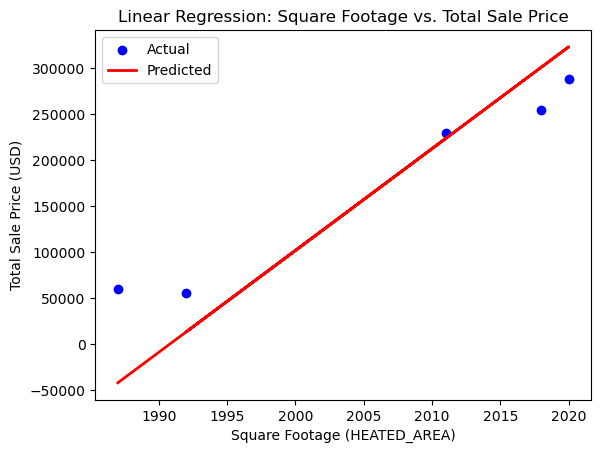

In [82]:
# Visualize the relationship with a line graph
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Square Footage (HEATED_AREA)')
plt.ylabel('Total Sale Price (USD)')
plt.title('Linear Regression: Square Footage vs. Total Sale Price')
plt.legend()
plt.show()


How has the average total sale price changed over time base on the year?

In [46]:
grouped_data = df.groupby(['year', 'PHYSICAL_CITY', 'PHYSICAL_ZIP_CODE'])['Total_sale_Price'].mean().reset_index()

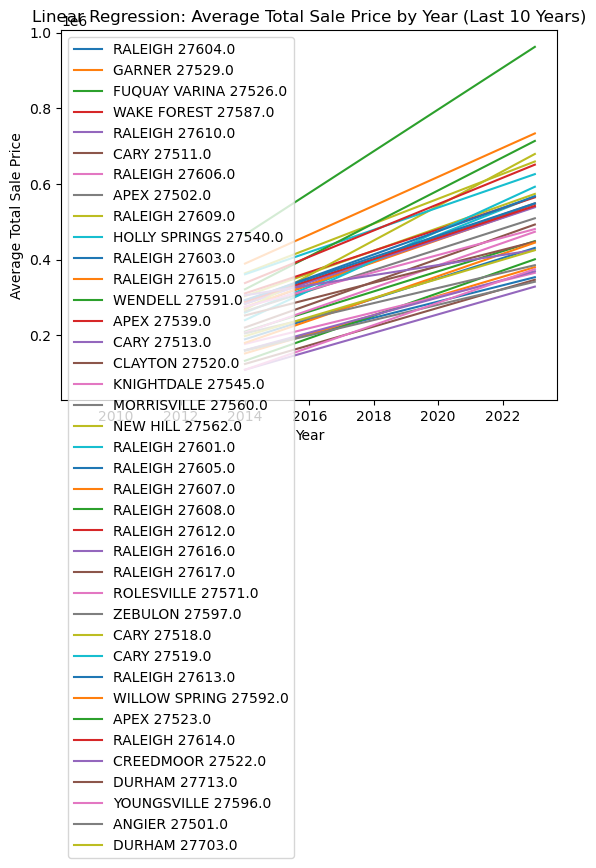

In [47]:
# # linear regression model to predict the average total sale price based on the year.
# city_zip_codes = grouped_data[['PHYSICAL_CITY', 'PHYSICAL_ZIP_CODE']].drop_duplicates()

# for _, row in city_zip_codes.iterrows():
#     city = row['PHYSICAL_CITY']
#     zip_code = row['PHYSICAL_ZIP_CODE']
    
# # Filter the data for the specific city and zip code
#     filtered_data = grouped_data[(grouped_data['PHYSICAL_CITY'] == city) & (grouped_data['PHYSICAL_ZIP_CODE'] == zip_code)]
    
#     # Proceed only if there are sufficient data points for training and testing
#     if len(filtered_data) > 1:
#         # Prepare the data
#         X = filtered_data['year'].values.reshape(-1, 1)
#         y = filtered_data['Total_sale_Price']
        
#         # Filter the data for the last 10 years
#         current_year = filtered_data['year'].max()
#         last_10_years_data = filtered_data[filtered_data['year'].between(current_year - 9, current_year)]
        
#         X = last_10_years_data['year'].values.reshape(-1, 1)
#         y = last_10_years_data['Total_sale_Price']
        
#         # Train the linear regression model
#         model = LinearRegression()
#         model.fit(X, y)
        
#         # Make predictions for the last 10 years
#         y_pred = model.predict(X)
        
#         # Visualize the relationship with a line graph
#         plt.plot(X, y_pred, label=f"{city} {zip_code}")
    
# plt.xlabel('Year')
# plt.ylabel('Average Total Sale Price')
# plt.title('Linear Regression: Average Total Sale Price by Year (Last 10 Years)')
# plt.legend()
# plt.show()


Mean Squared Error for RALEIGH 27604.0 : 2512108962.985105


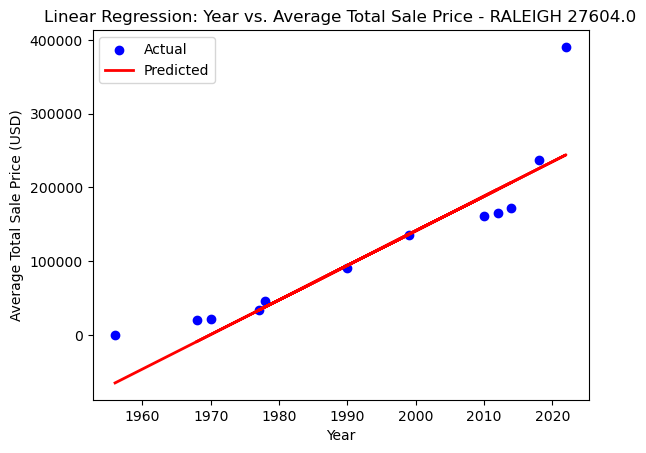

Mean Squared Error for GARNER 27529.0 : 1343686520.924966


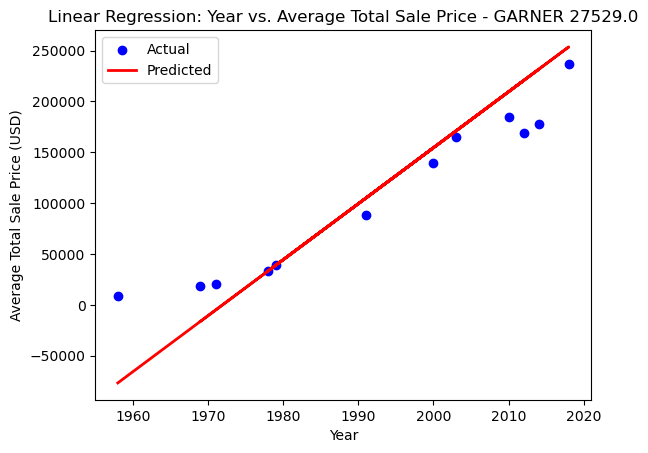

Mean Squared Error for FUQUAY VARINA 27526.0 : 2100703782.3601973


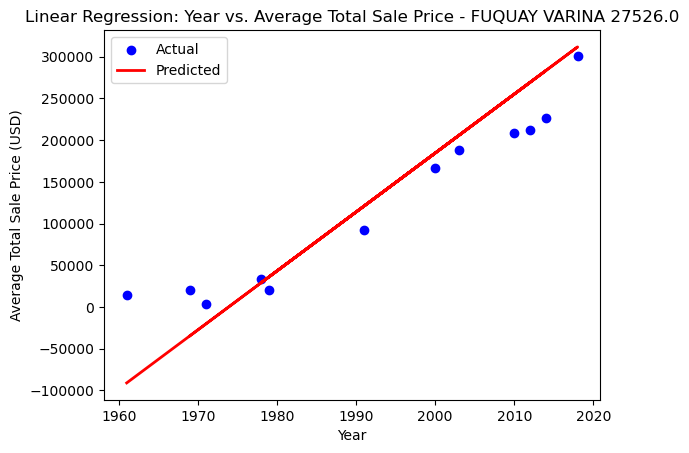

Mean Squared Error for WAKE FOREST 27587.0 : 2570646783.722116


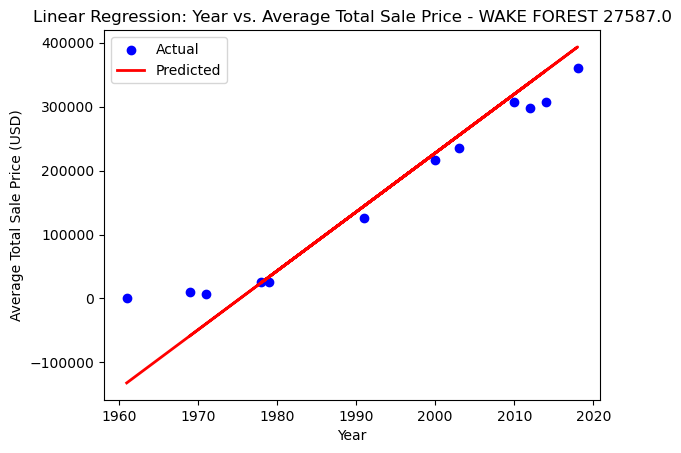

Mean Squared Error for RALEIGH 27610.0 : 2015813748.9971106


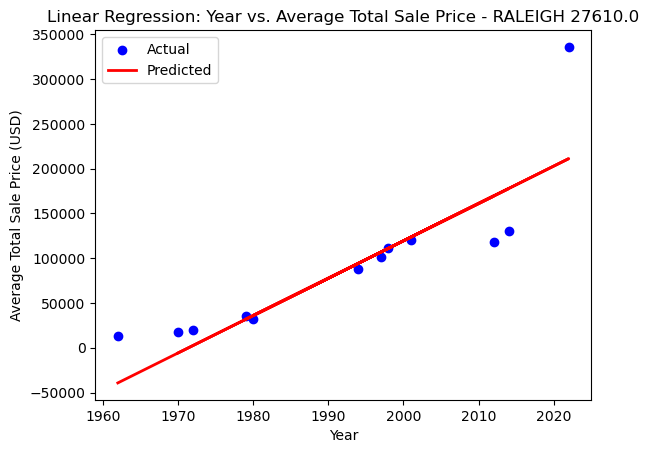

Mean Squared Error for CARY 27511.0 : 2897602686.5227733


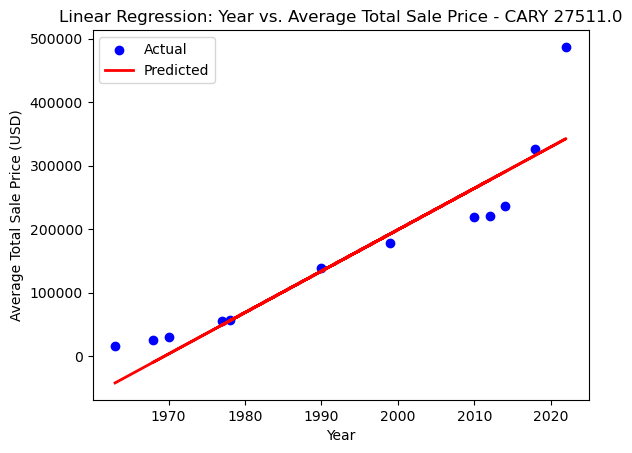

Mean Squared Error for RALEIGH 27606.0 : 2084002541.1507645


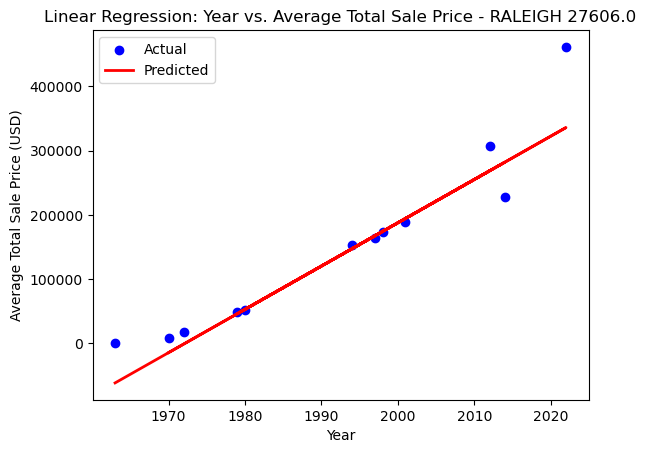

Mean Squared Error for APEX 27502.0 : 4361564240.23598


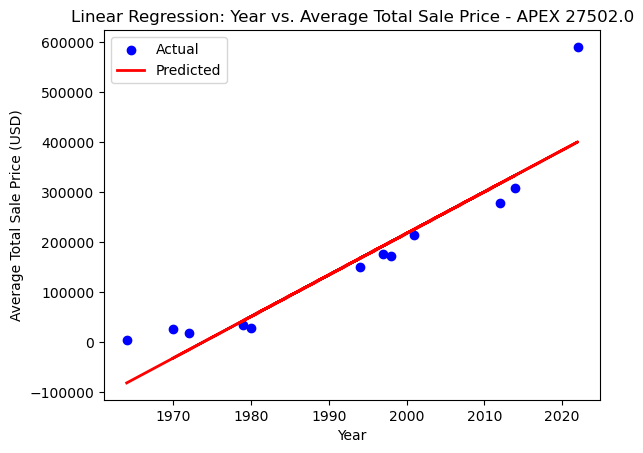

Mean Squared Error for RALEIGH 27609.0 : 4413868541.239939


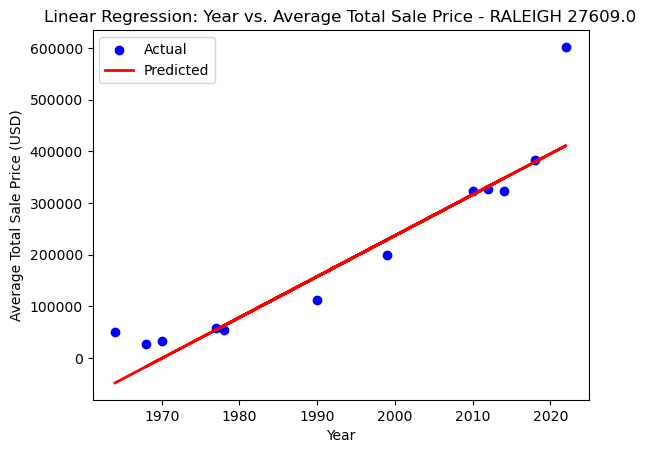

Mean Squared Error for HOLLY SPRINGS 27540.0 : 6553158843.624963


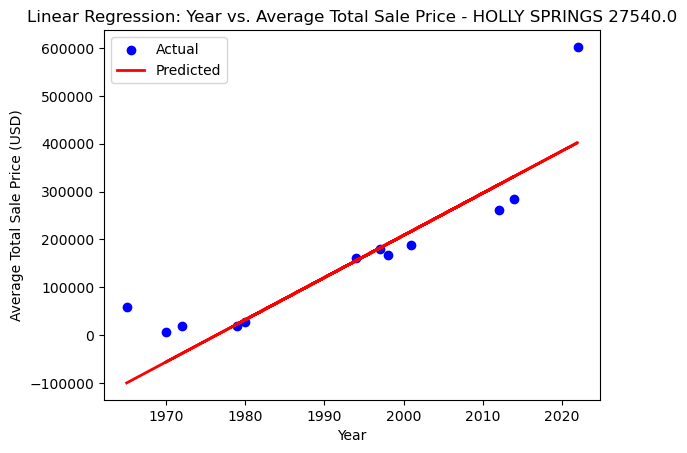

Mean Squared Error for RALEIGH 27603.0 : 2099989467.8879678


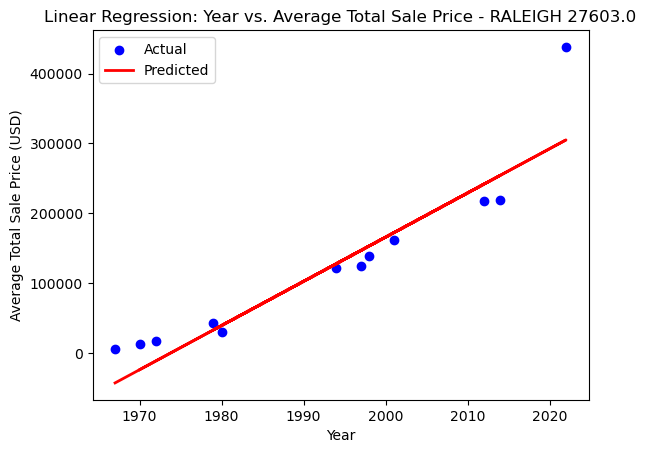

Mean Squared Error for RALEIGH 27615.0 : 2300046926.0659


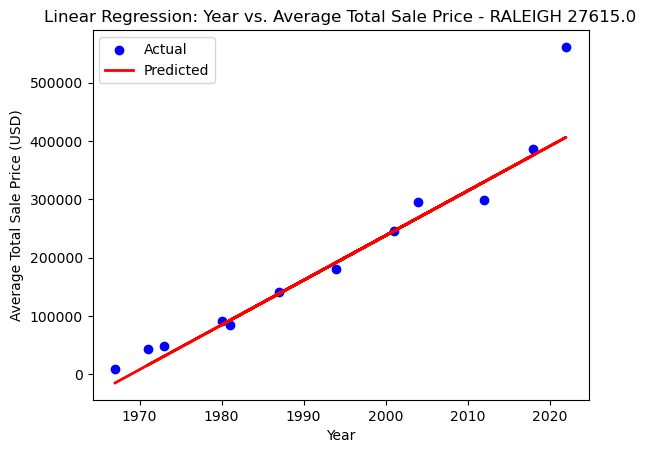

Mean Squared Error for WENDELL 27591.0 : 3179018630.587251


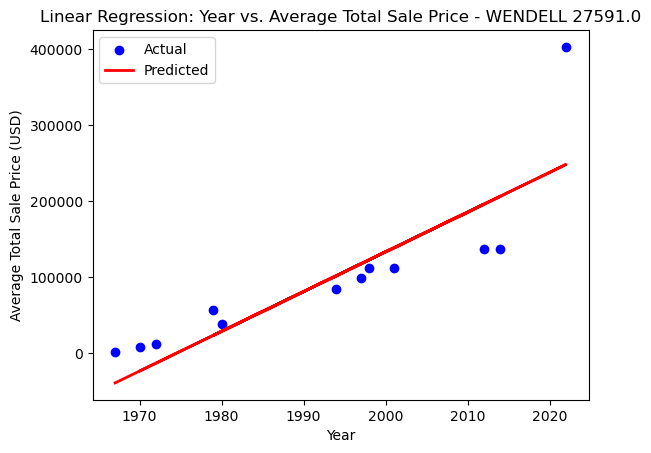

Mean Squared Error for APEX 27539.0 : 2894913095.397901


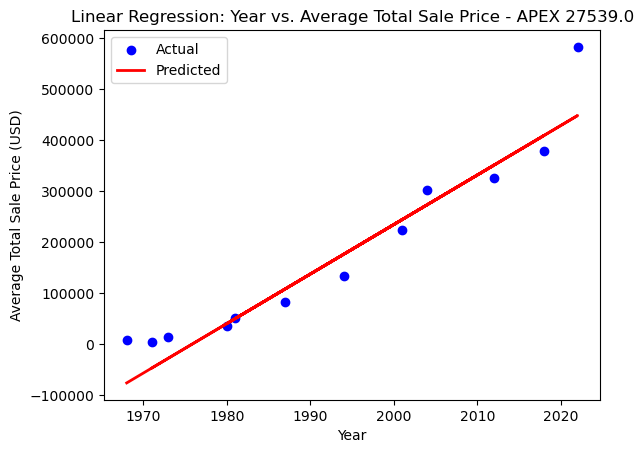

Mean Squared Error for CARY 27513.0 : 1282904165.3502257


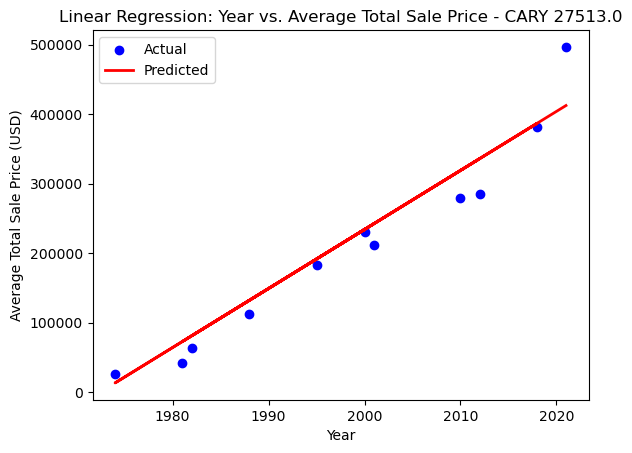

Mean Squared Error for CLAYTON 27520.0 : 755079703.8572767


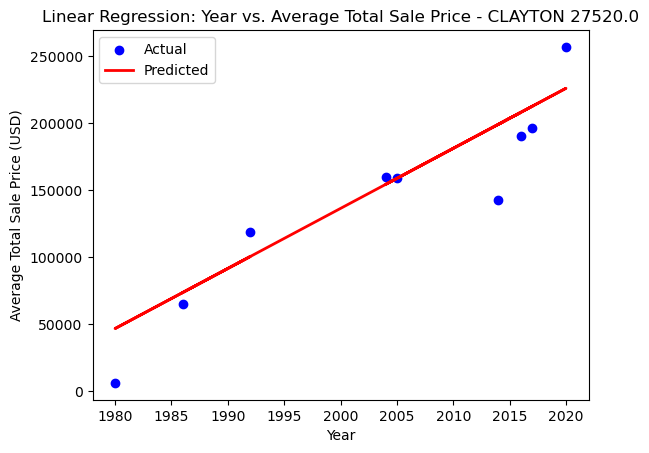

Mean Squared Error for KNIGHTDALE 27545.0 : 1755063143.1412728


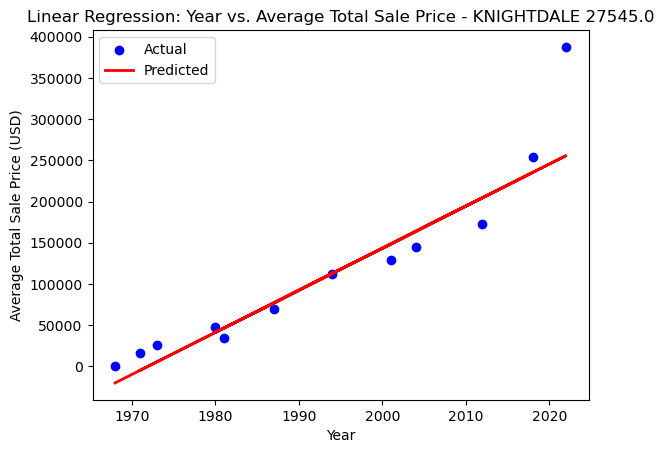

Mean Squared Error for MORRISVILLE 27560.0 : 1109179764.0025525


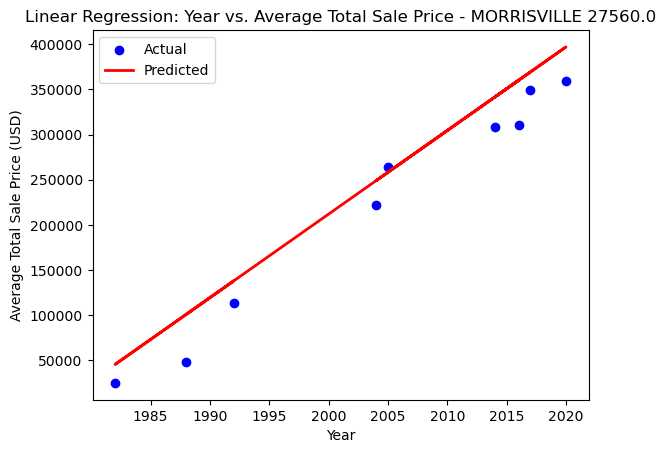

Mean Squared Error for NEW HILL 27562.0 : 15699893741.553219


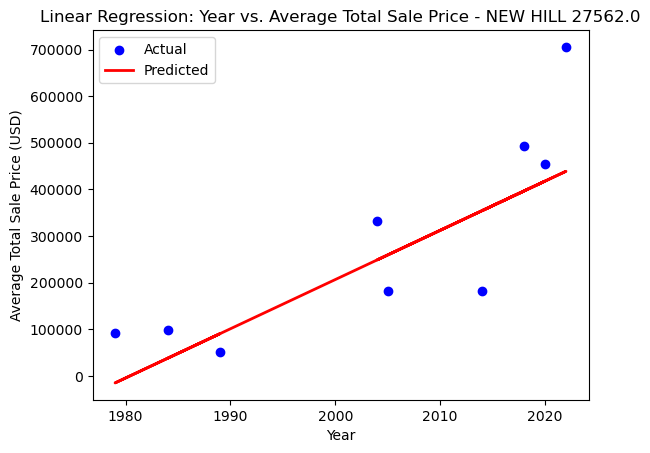

Mean Squared Error for RALEIGH 27601.0 : 5968156591.17883


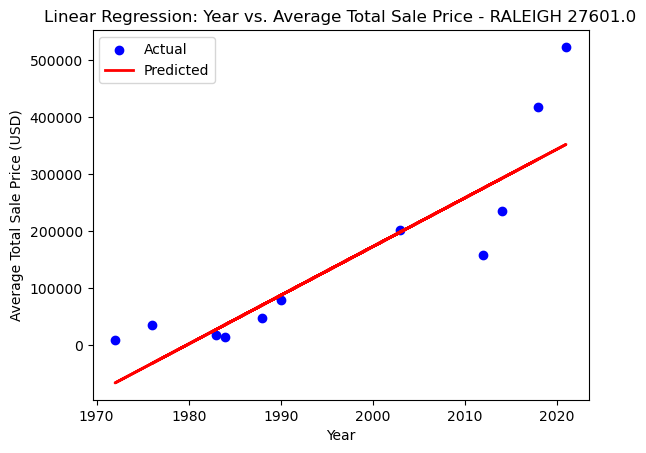

Mean Squared Error for RALEIGH 27605.0 : 1520100490.898719


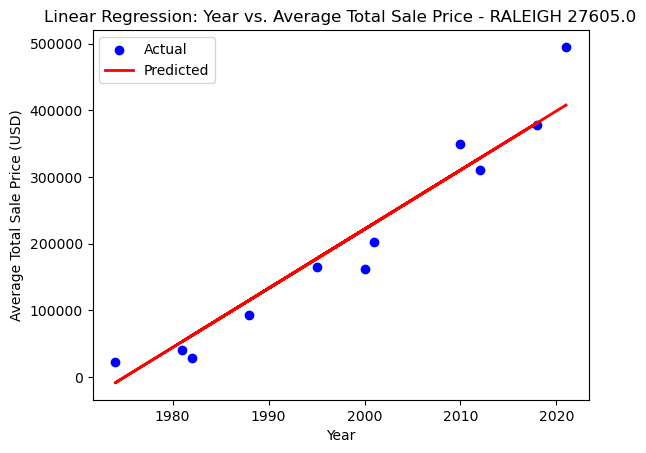

Mean Squared Error for RALEIGH 27607.0 : 6977988321.117611


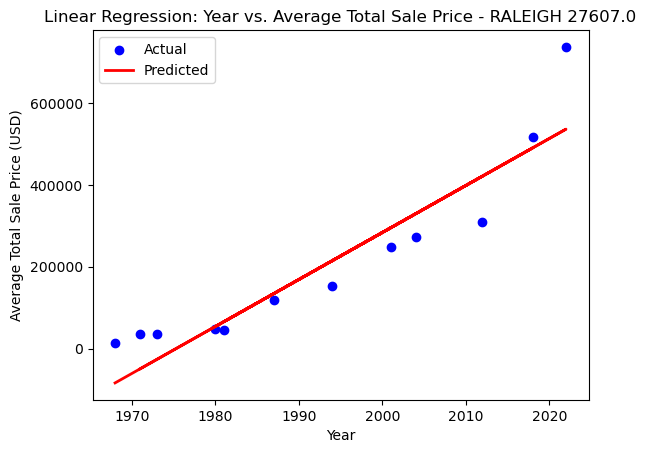

Mean Squared Error for RALEIGH 27608.0 : 7686979137.491863


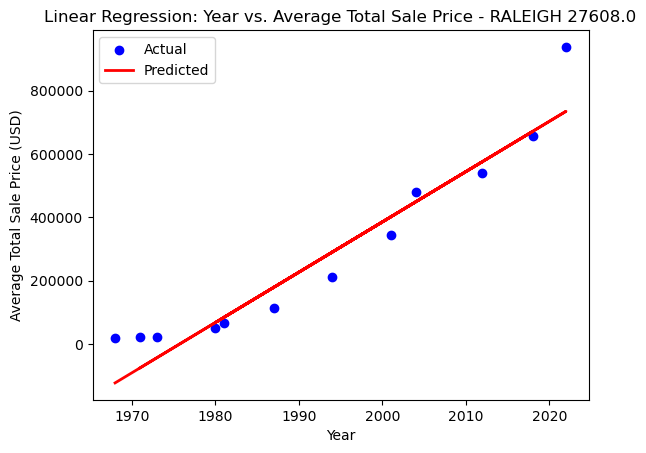

Mean Squared Error for RALEIGH 27612.0 : 2473127244.8546977


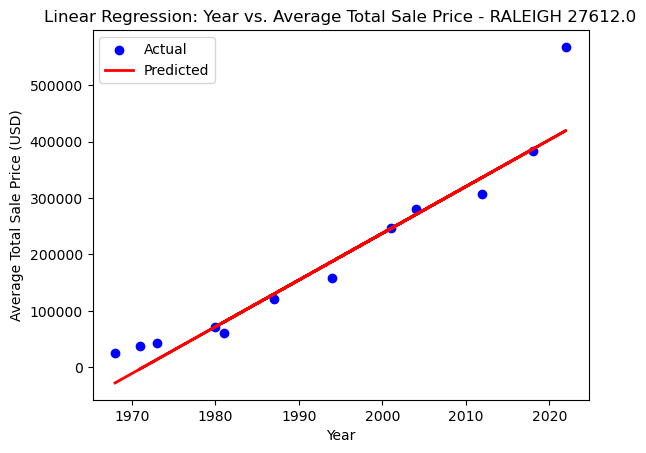

Mean Squared Error for RALEIGH 27616.0 : 1893061350.8908126


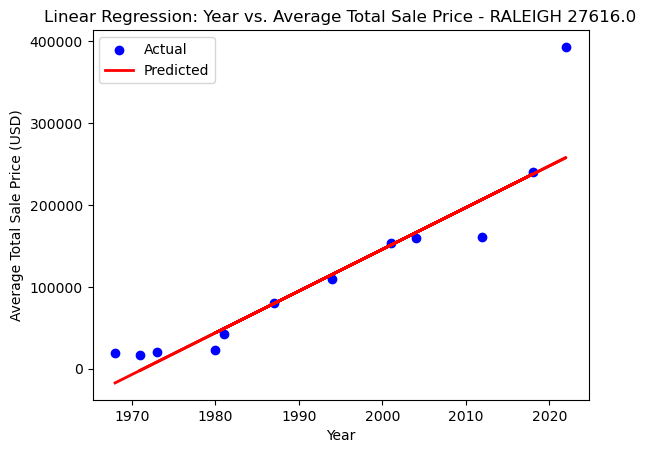

Mean Squared Error for RALEIGH 27617.0 : 4032744466.2850604


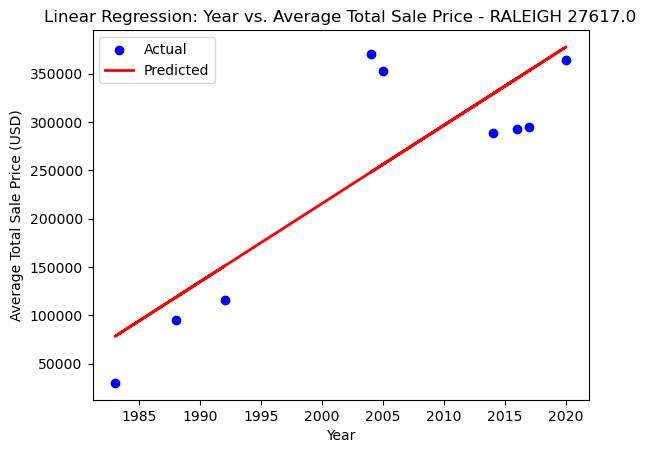

Mean Squared Error for ROLESVILLE 27571.0 : 2892716363.666444


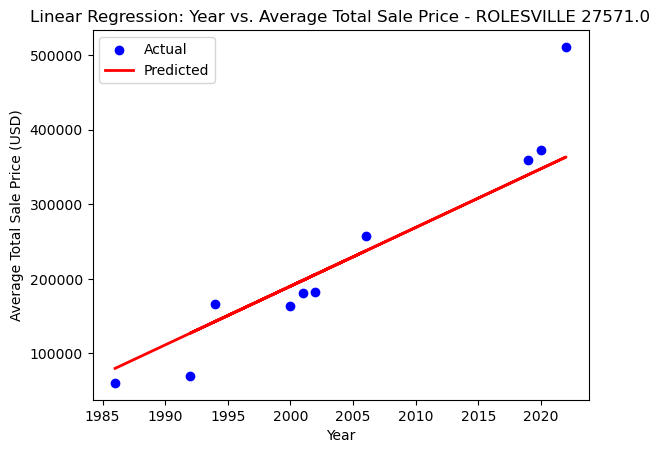

Mean Squared Error for ZEBULON 27597.0 : 1519567386.8520563


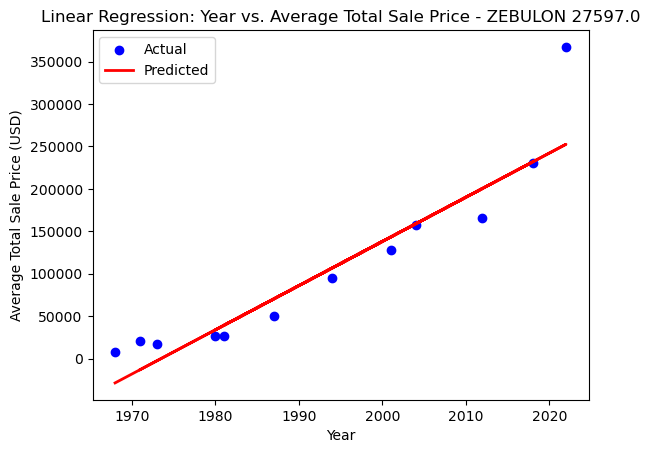

Mean Squared Error for CARY 27518.0 : 1085642952.0339468


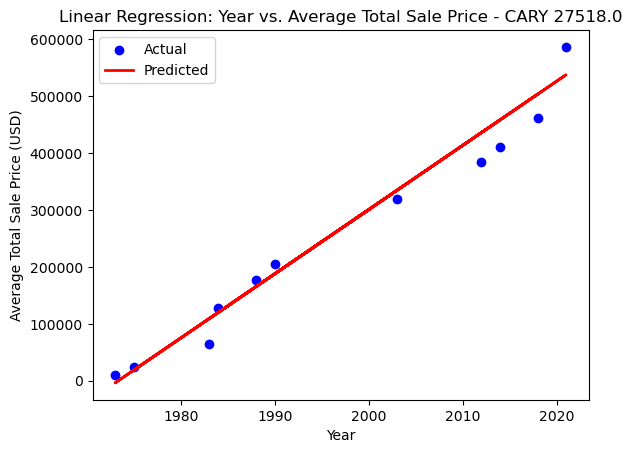

Mean Squared Error for CARY 27519.0 : 1126779618.74942


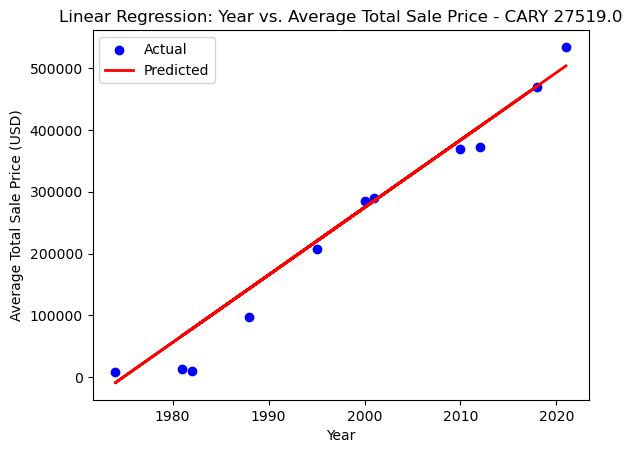

Mean Squared Error for RALEIGH 27613.0 : 561411202.1919277


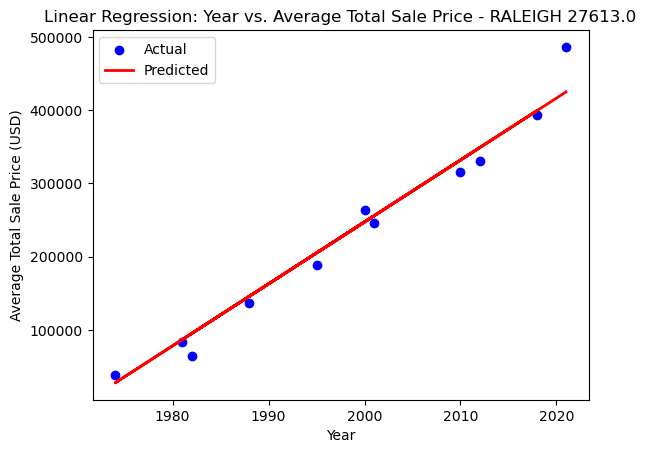

Mean Squared Error for WILLOW SPRING 27592.0 : 2811488416.420716


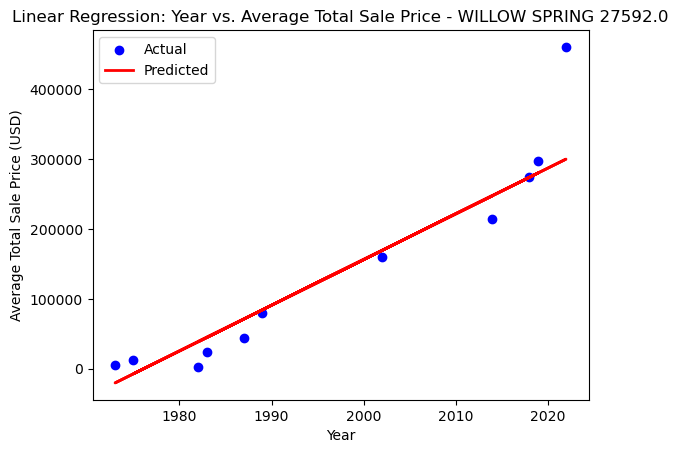

Mean Squared Error for APEX 27523.0 : 6864606983.833341


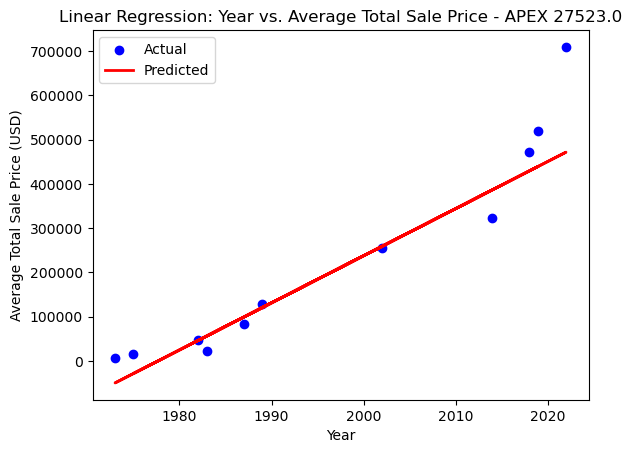

Mean Squared Error for RALEIGH 27614.0 : 4828082590.541385


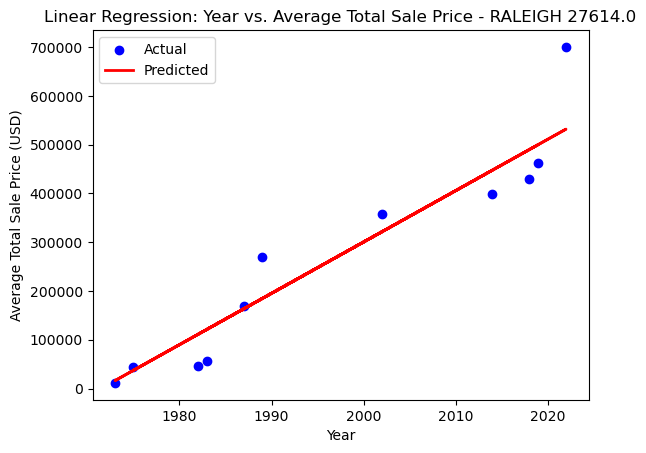

Mean Squared Error for CREEDMOOR 27522.0 : 22598976471.5318


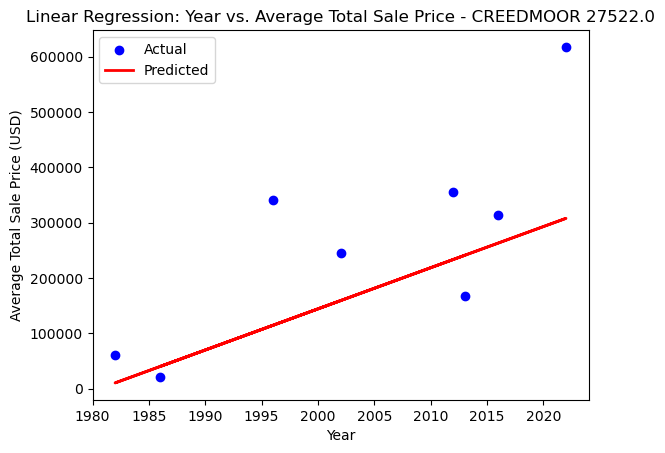

Mean Squared Error for DURHAM 27713.0 : 329019290.12344366


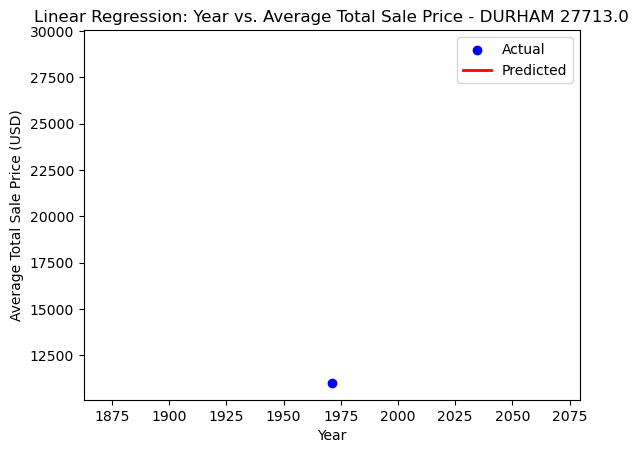

Mean Squared Error for YOUNGSVILLE 27596.0 : 1046112367.090007


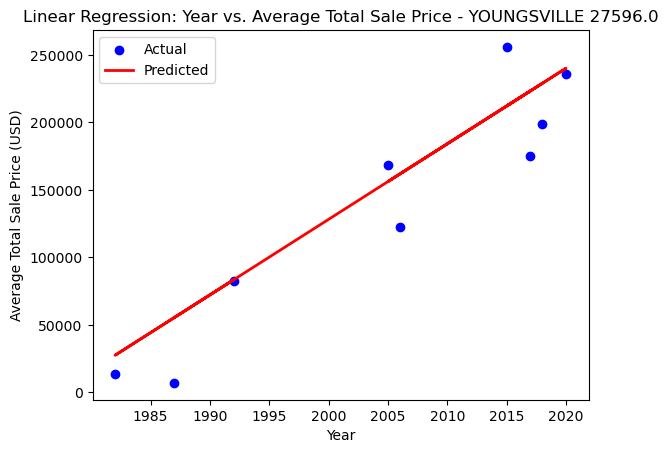

Mean Squared Error for ANGIER 27501.0 : 3147599668.2842226


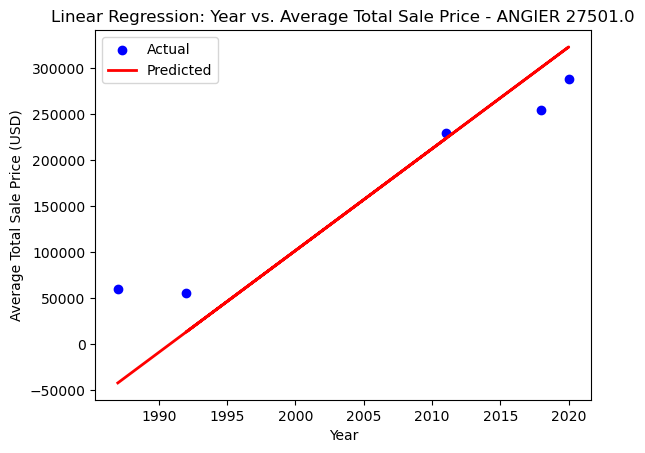

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
city_zip_codes = grouped_data[['PHYSICAL_CITY', 'PHYSICAL_ZIP_CODE']].drop_duplicates()

for _, row in city_zip_codes.iterrows():
    city = row['PHYSICAL_CITY']
    zip_code = row['PHYSICAL_ZIP_CODE']
    
    # Filter the data for the specific city and zip code
    filtered_data = grouped_data[(grouped_data['PHYSICAL_CITY'] == city) & (grouped_data['PHYSICAL_ZIP_CODE'] == zip_code)]
    
    # Prepare the data
    X = filtered_data['year'].values.reshape(-1, 1)
    y = filtered_data['Total_sale_Price']
    
    # Split the data into training and testing sets (optional if you have sufficient data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model (optional if you have sufficient data)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for", city, zip_code, ":", mse)
    
    # Visualize the relationship with a line graph
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Year')
    plt.ylabel('Average Total Sale Price (USD)')
    plt.title('Linear Regression: Year vs. Average Total Sale Price - ' + city + ' ' + str(zip_code))
    plt.legend()
    plt.show()


In [51]:
max_growth_city = ''
max_growth_zip = ''
max_growth_percentage = 0.0

for _, row in city_zip_codes.iterrows():
    city = row['PHYSICAL_CITY']
    zip_code = row['PHYSICAL_ZIP_CODE']
    
    # Filter the data for the specific city and zip code
    filtered_data = grouped_data[(grouped_data['PHYSICAL_CITY'] == city) & (grouped_data['PHYSICAL_ZIP_CODE'] == zip_code)]
    
    # Proceed only if there are sufficient data points for calculation
    if len(filtered_data) >= 2:
        # Filter the data for the last 5-10 years
        current_year = df['year'].max()
        last_10_years_data = filtered_data[filtered_data['year'].between(current_year - 9, current_year)]
        
        # Calculate the percentage change in sales
        sales = last_10_years_data['Total_sale_Price']
        
        if len(sales) >= 2:
            initial_sales = sales.iloc[0]
            
            if initial_sales != 0:
                growth_percentage = (sales.iloc[-1] - initial_sales) / initial_sales * 100
                
                # Check if the current growth percentage is higher than the maximum growth percentage
                if growth_percentage > max_growth_percentage:
                    max_growth_percentage = growth_percentage
                    max_growth_city = city
                    max_growth_zip = zip_code

# Handle cases where growth percentage is 'inf'
if max_growth_percentage == float('inf'):
    max_growth_percentage = 0.0

print("City with the highest sales growth in the last 5-10 years:", max_growth_city)
print("Zip code with the highest sales growth in the last 5-10 years:", max_growth_zip)
print("Sales growth percentage in the last 5-10 years:", max_growth_percentage)


City with the highest sales growth in the last 5-10 years: YOUNGSVILLE
Zip code with the highest sales growth in the last 5-10 years: 27596.0
Sales growth percentage in the last 5-10 years: 363.72629843363563


In [55]:
# Getting Description
df['Total_sale_Price'].describe()

count    3.234140e+05
mean     3.042200e+05
std      2.170023e+05
min      0.000000e+00
25%      1.610000e+05
50%      2.610000e+05
75%      3.905000e+05
max      7.940000e+06
Name: Total_sale_Price, dtype: float64

In [56]:
df['HEATED_AREA'].describe()

count    323414.000000
mean       2289.883614
std        1004.186978
min         220.000000
25%        1552.000000
50%        2114.000000
75%        2818.000000
max       21993.000000
Name: HEATED_AREA, dtype: float64

In [90]:
wake_houses = df.groupby(['PHYSICAL_CITY'])["Total_sale_Price"].mean().reset_index(name='House_Average_Price_by_City')
wake_houses.head(10)

,PHYSICAL_CITY,House_Average_Price_by_City
0,ANGIER,290755.780347
1,APEX,372647.052978
2,CARY,352153.172423
3,CLAYTON,170533.950617
4,CREEDMOOR,214422.535211
5,DURHAM,301566.265060
6,FUQUAY VARINA,297121.465812
7,GARNER,210198.651832
8,HOLLY SPRINGS,361836.137512
9,KNIGHTDALE,212332.335137
